In [0]:
import tensorflow.keras
import tensorflow

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras import backend as K 
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Function to generate a random number, given input limits
def generate_random_number(lower = -1, upper = 1):
    # Random float between [lower,upper)
    ran = np.random.uniform(lower,upper)
    return np.around(ran,decimals=5)

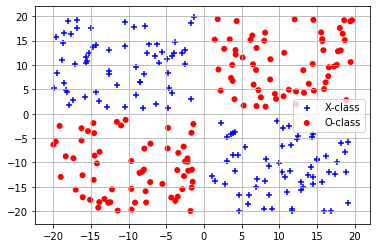

In [0]:
# set up number of training samples 
N = 250 # how many samples 

# set up upper and lower bound on your input probabilities 
Uh = 20 # upper limit 
Ul = -1 # lower limit 

# Number of Epochs
epochs = 1000

# set up the O-class (first and third quadrant)
O = np.array([
              [generate_random_number(-Ul,Uh),generate_random_number(-Ul,Uh)] if i % 2 == 0
              else [generate_random_number(Ul,-Uh),generate_random_number(Ul,-Uh)] for i in range(N//2)]) # the o-class contains N uniformly randomly 
        # distributed samples whose x and y are both (-Ul, Uh) or (Ul, -Uh) first and third quadrants

# set up the X-class (second and fourth quadrant) 
X = np.array([
              [generate_random_number(Ul,-Uh),generate_random_number(-Ul,Uh)] if i % 2 == 0
              else [generate_random_number(-Ul,Uh),generate_random_number(Ul,-Uh)] for i in range(N//2)]) # the x-class contains N uniformly randomly 
        # distributed samples whose x and y are in the second and fourth quadrants

# plot the X-class and O-class
plt.scatter(X[:,0],X[:,1],marker='+',c='blue',label='X-class')
plt.scatter(O[:,0],O[:,1],marker='o',c='red',edgecolors='none',label='O-class')
plt.legend() 
plt.grid(True) 
# plt.savefig("test.png")

In [0]:
# set up the training samples from the X-class and the O-class 
x_train = np.append(X,O,axis=0) # compile the x- and o- classes into the x_train array

# set up the labels [1 0] for each x-class and [0 1] for each o-class 
# y_x = np.array([[1, 0] for i in range(N//2)])
# y_o = np.array([[0, 1] for i in range(N//2)])
y_x = np.array([[1] for i in range(N//2)])
y_o = np.array([[0] for i in range(N//2)])

# set up the trraining labels 
y_train = np.append(y_x,y_o,axis=0)#compile the labels into the y_train array for class labels 

In [0]:
# Clears any history of any model
K.clear_session()

# set up your model as sequential 
model = Sequential()

# add a dense layer with 8 nodes and relu activations. Note: the input is two-dimensional
model.add(Dense(8,input_dim=2)) 
model.add(Activation('relu')) 

# add another dense layer as the output layer with sigmoid activations. Note: output will be two-dimensional 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

# print the shape, summary, configuration, and initial weights of your network 
model.summary()

from tensorflow.keras.utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
activation (Activation)      (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [0]:
# # Clears any history of any model
# K.clear_session()

# # set up your model as sequential 
# model = Sequential()

# # add a dense layer with 8 nodes and relu activations. Note: the input is two-dimensional
# model.add(Dense(32,input_dim=2)) 
# model.add(Activation('relu')) 
# model.add(Dense(32)) 
# model.add(Activation('relu')) 
# model.add(Dense(32)) 
# model.add(Activation('relu')) 

# # add another dense layer as the output layer with sigmoid activations. Note: output will be two-dimensional 
# model.add(Dense(1)) 
# model.add(Activation('sigmoid')) 

# # print the shape, summary, configuration, and initial weights of your network 
# model.summary()

# from tensorflow.keras.utils import plot_model
# # plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
# setup the loss as binary cross entropy, optimizer as adam, and metrics as accuracy for your model and compile 
model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
 
# train your model using x_train, y_train, and for a certain number of epochs, with a batch_size of n, and set verbose to 1 
model.fit(x=x_train,
          y=y_train,
          epochs=epochs,
          batch_size=N,
          verbose=1) 

In [0]:
# set up 300 samples as test (150 for the x-class and 150 for the o-class) 
# create the labels for these items as well [1 0] for each x-class and [0 1] for each o-class 
N_test = 300

O_final = np.array([
              [generate_random_number(-Ul,Uh),generate_random_number(-Ul,Uh)] if i % 2 == 0
              else [generate_random_number(Ul,-Uh),generate_random_number(Ul,-Uh)] for i in range(N_test//2)]) 

X_final = np.array([
              [generate_random_number(Ul,-Uh),generate_random_number(-Ul,Uh)] if i % 2 == 0
              else [generate_random_number(-Ul,Uh),generate_random_number(Ul,-Uh)] for i in range(N_test//2)])

x_test = np.append(X_final,O_final,axis=0)

# set up the labels [1 0] for each x-class and [0 1] for each o-class 
# y_xtest = np.array([[1,0] for i in range(N_test//2)])
# y_otest = np.array([[0,1] for i in range(N_test//2)])
y_xfinal = np.array([[1] for i in range(N_test//2)])
y_ofinal = np.array([[0] for i in range(N_test//2)])

y_test = np.append(y_xfinal,y_ofinal,axis=0)

In [0]:
# evaluate your model 
score = model.evaluate(x=x_test,
          y=y_test,
          verbose=2) 
print(score) 

300/300 - 0s - loss: 0.0532 - acc: 1.0000
[0.05322303265333175, 1.0]


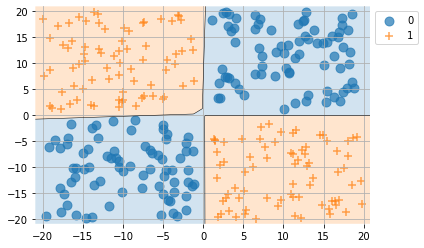

In [0]:
from mlxtend.plotting import plot_decision_regions

# Finds the indicies of the wrongly predicted test data
incorrects = np.nonzero(model.predict_classes(x_test) != y_test)
incorrect_data = np.array([x_test[i] for i in incorrects[0]])

# Plot coloring
scatter_highlight_kwargs = {'s': 250, 'label': 'Incorrect Predictions', 'alpha': 0.8}
scatter_kwargs = {'s': 80, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}

# Plotting the data
if(incorrect_data.size == 0):
    plot_decision_regions(x_test, y_test[:,0], clf=model, legend=2,
                        markers = ['o','+'],
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs)
else:
    plot_decision_regions(x_test, y_test[:,0], clf=model, legend=2,
                        X_highlight=incorrect_data,
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.grid(True) 
# plt.savefig("result.png")